In [103]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import random
matplotlib.style.use('default') 

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format


import matplotlib.pylab as pylab

'''
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'} 

pylab.rcParams.update(params)
'''

"\nparams = {'legend.fontsize': 'large',\n          'figure.figsize': (8, 6),\n         'axes.labelsize': 'large',\n         'axes.titlesize':'large',\n         'xtick.labelsize':'large',\n         'ytick.labelsize':'large'} \n\npylab.rcParams.update(params)\n"

In [104]:
#import data
db = pd.read_csv('/Users/mulhamalassad/Desktop/Capstone/Data/CBC_41.csv')


In [105]:
#preview data
db

,appleStore.M.title.S,outputs.L,platforms.L,functionalities.L,appleStore.M.description.S,appleStore.M.title.S.1,appleStore.M.currentVersionReviews.N,appleStore.M.score.N,appleStore.M.reviews.N,appleStore.M.genres.L,appleStore.M.price.N,appleStore.M.currentVersionScore.N,appleStore.M.primaryGenre.S,appleStore.M.free.BOOL,appleStore.M.developerWebsite.S,appleStore.M.released.S,appleStore.M.languages.L,appleStore.M.requiredOsVersion.S,appleStore.M.developerUrl.S,appleStore.M.version.S,appleStore.M.url.S,appleStore.M.size.S,appleStore.M.contentRating.S,appleStore.M.developer.S,appleStore.M.updated.S,uses.L,readingLevel.S,privacies.L,androidStore.M.genreId.S,androidStore.M.maxInstalls.N,androidStore.M.description.S,androidStore.M.androidVersionText.S,androidStore.M.developerEmail.S,androidStore.M.title.S,androidStore.M.adSupported.BOOL,androidStore.M.score.N,androidStore.M.reviews.N,androidStore.M.ratings.N,androidStore.M.price.N,androidStore.M.genre.S,androidStore.M.descriptionHTML.S,androidStore.M.currency.S,androidStore.M.free.BOOL,androidStore.M.developerWebsite.S,androidStore.M.priceText.S,androidStore.M.released.S,androidStore.M.summary.S,androidStore.M.comments.L,androidStore.M.privacyPolicy.S,androidStore.M.editorsChoice.BOOL,androidStore.M.version.S,androidStore.M.installs.S,androidStore.M.url.S,androidStore.M.histogram.M.1.N,androidStore.M.histogram.M.2.N,androidStore.M.histogram.M.3.N,androidStore.M.histogram.M.4.N,androidStore.M.histogram.M.5.N,androidStore.M.minInstalls.N,androidStore.M.size.S,androidStore.M.offersIAP.BOOL,androidStore.M.androidVersion.S,androidStore.M.scoreText.S,androidStore.M.IAPRange.S,androidStore.M.developer.S,androidStore.M.contentRating.S,features.L,conditions.L,clinicalFoundations.L,efficacyStudies.N,feasibilityStudies.N,review.S,feasibilityImpact.N,engagements.L,iosLink.S,efficacyImpact.N,costs.L,developerTypes.L,inputs.L,androidStore.M.recentChanges.S,efficacyStudies.S,_rev.S,feasibilityStudies.S,feasibilityImpact.S,efficacyImpact.S,readingLevel.N,parent.M._id.S,webLink.S,parent.M._rev.S,androidStore.M.developerAddress.S,androidStore.M.video.S,androidStore.M.videoImage.S,parent.S,feasibilityStudiesLink.S,efficacyStudiesLink.S,androidStore.M.contentRatingDescription.S,name.S,company.S,androidStore.M.familyGenre.S,androidStore.M.familyGenreId.S
0,Wysa: Mental Health Support,"['Notifications', 'References/Information', 'R...","['Android', 'iOS']",['Accessibility'],Wysa is used by more than a million people fro...,Wysa: Mental Health Support,4691.00,4.85,4691.00,"['Health & Fitness', 'Lifestyle']",0.00,4.85,Health & Fitness,True,http://www.wysa.io,2016-10-23T05:04:05Z,['EN'],10.00,https://apps.apple.com/us/developer/touchkin/i...,5.8.4,https://apps.apple.com/us/app/wysa-mental-heal...,73242624.00,12+,Touchkin,2021-02-02T14:51:33Z,['Self Help'],13,"['Has Privacy Policy', 'Data Stored on Server'...",HEALTH_AND_FITNESS,2268322.00,"Imagine a mood tracker, mindfulness coach, anx...",4.1 and up,shubhankar@touchkin.com,"Wysa: stress, depression & anxiety therapy cha...",False,4.77,35131.00,75871.00,0.00,Health & Fitness,"Imagine a mood tracker, mindfulness coach, anx...",USD,True,https://www.wysa.io,Free,6-Oct-16,"Free therapy chat for mindfulness, mental heal...","[""I really like this app. I find it convenient...",http://beta.touchkin.com/privatepolicy.html,False,2.4.5,"1,000,000+",https://play.google.com/store/apps/details?id=...,1388.00,356.00,1140.00,8725.00,64260.00,1000000.00,8.3M,True,4.1,4.80,$1.49 - $199.99 per item,Touchkin,Everyone,"['Track Mood', 'Psychoeducation', 'Journaling'...","['Mood Disorders', 'Stress & Anxiety', 'Sleep']","['Well Written Relevant Content', 'Does What i...",NaN,NaN,"Wysa is an app based on a chat-bot, which can ...",NaN,"['User Generated Data', 'Chat/Message', 'Asses...",https://apps.apple.com/us/app/wysa-mental-heal...,NaN,"['Free to Download', 'Subscription']",['For Profit Company'],['Surveys'],- Get to the right ✅ tools and techniques 🛠fas...,1.00,NaN,1.00,0.00,

In [106]:
#dropping unneeded columns
db.drop(['appleStore.M.description.S','appleStore.M.price.N','appleStore.M.developerWebsite.S',
         'appleStore.M.free.BOOL', 'appleStore.M.requiredOsVersion.S', 'appleStore.M.developerUrl.S',
        'appleStore.M.version.S', 'appleStore.M.url.S', 'appleStore.M.size.S','appleStore.M.contentRating.S',
        'appleStore.M.developer.S',  'androidStore.M.description.S','androidStore.M.androidVersionText.S',
        'androidStore.M.developerEmail.S', 'androidStore.M.adSupported.BOOL', 'androidStore.M.price.N', 'efficacyImpact.N',
        'androidStore.M.genre.S','androidStore.M.descriptionHTML.S', 'androidStore.M.currency.S', 'feasibilityImpact.S', 'efficacyImpact.S',
       'androidStore.M.free.BOOL', 'androidStore.M.developerWebsite.S',  'androidStore.M.contentRating.S',
       'androidStore.M.priceText.S', 'androidStore.M.editorsChoice.BOOL', 'androidStore.M.url.S', 'feasibilityImpact.N',
        'androidStore.M.histogram.M.1.N','androidStore.M.histogram.M.4.N', 'androidStore.M.histogram.M.5.N', 'appleStore.M.released.S',
        'androidStore.M.size.S','androidStore.M.offersIAP.BOOL','androidStore.M.IAPRange.S',  'androidStore.M.scoreText.S',
         'androidStore.M.developer.S','appleStore.M.title.S.1', 'appleStore.M.currentVersionReviews.N', 
         'appleStore.M.currentVersionReviews.N', 'appleStore.M.primaryGenre.S', 'androidStore.M.privacyPolicy.S',
         'androidStore.M.summary.S', 'androidStore.M.comments.L','androidStore.M.histogram.M.2.N', 'androidStore.M.released.S',
       'androidStore.M.version.S','androidStore.M.minInstalls.N', 'androidStore.M.androidVersion.S','efficacyStudies.N',
       'feasibilityStudies.N', 'review.S', 'androidStore.M.installs.S',
       'androidStore.M.histogram.M.3.N','androidStore.M.developerAddress.S', 'androidStore.M.video.S',  'androidStore.M.ratings.N','androidStore.M.genreId.S',
       'androidStore.M.videoImage.S','parent.S','androidStore.M.contentRatingDescription.S','name.S', 'company.S', 
         'androidStore.M.familyGenre.S','parent.M._id.S', 'webLink.S', 'parent.M._rev.S' ,'readingLevel.N','feasibilityStudiesLink.S', 'efficacyStudiesLink.S',
       'androidStore.M.familyGenreId.S', 'appleStore.M.genres.L','appleStore.M.currentVersionScore.N',   'androidStore.M.recentChanges.S', '_rev.S', 'iosLink.S'], axis = 1, inplace = True)

In [107]:
#names of columns
db.columns


Index(['appleStore.M.title.S', 'outputs.L', 'platforms.L', 'functionalities.L',
       'appleStore.M.score.N', 'appleStore.M.reviews.N',
       'appleStore.M.languages.L', 'appleStore.M.updated.S', 'uses.L',
       'readingLevel.S', 'privacies.L', 'androidStore.M.maxInstalls.N',
       'androidStore.M.title.S', 'androidStore.M.score.N',
       'androidStore.M.reviews.N', 'features.L', 'conditions.L',
       'clinicalFoundations.L', 'engagements.L', 'costs.L', 'developerTypes.L',
       'inputs.L', 'efficacyStudies.S', 'feasibilityStudies.S'],
      dtype='object')

In [108]:
#renaming columns for easier use
db.rename(columns= {"appleStore.M.title.S":"ios_title", "outputs.L":"outputs", "platforms.L":"platform",
          "functionalities.L":"functionalities", "appleStore.M.score.N":"ios_rating", 'appleStore.M.reviews.N':'ios_reviews',
       'appleStore.M.languages.L':'ios_languages', 'appleStore.M.updated.S':'ios_date_updated', 'uses.L':'uses',
       'readingLevel.S':'privacy_reading_level', 'privacies.L':'privacy_options', 'androidStore.M.maxInstalls.N':'android_installs',
       'androidStore.M.title.S':'android_title', 'androidStore.M.score.N':'android_rating',
        'androidStore.M.reviews.N':'android_reviews', 'features.L':'features', 'conditions.L':'conditions',
       'clinicalFoundations.L':'clinical_foundations', 'engagements.L':'engagements', 'costs.L':'cost', 'developerTypes.L':'developer_type',
       'inputs.L':'inputs', 'efficacyStudies.S':'efficacy_studies', 'feasibilityStudies.S':'feasibility_studies'
                   }, inplace = True)

db.columns

Index(['ios_title', 'outputs', 'platform', 'functionalities', 'ios_rating',
       'ios_reviews', 'ios_languages', 'ios_date_updated', 'uses',
       'privacy_reading_level', 'privacy_options', 'android_installs',
       'android_title', 'android_rating', 'android_reviews', 'features',
       'conditions', 'clinical_foundations', 'engagements', 'cost',
       'developer_type', 'inputs', 'efficacy_studies', 'feasibility_studies'],
      dtype='object')

In [109]:
#filling nans
#db['ios_rating'].fillna(db['ios_rating'].mean(), inplace = True)
#db['android_rating'].fillna(db['android_rating'].mean(), inplace = True)
#db['ios_reviews'].fillna(db['ios_reviews'].mean(), inplace = True)
#db['android_reviews'].fillna(db['android_reviews'].mean(), inplace = True)





In [110]:
db

,ios_title,outputs,platform,functionalities,ios_rating,ios_reviews,ios_languages,ios_date_updated,uses,privacy_reading_level,privacy_options,android_installs,android_title,android_rating,android_reviews,features,conditions,clinical_foundations,engagements,cost,developer_type,inputs,efficacy_studies,feasibility_studies
0,Wysa: Mental Health Support,"['Notifications', 'References/Information', 'R...","['Android', 'iOS']",['Accessibility'],4.85,4691.00,['EN'],2021-02-02T14:51:33Z,['Self Help'],13,"['Has Privacy Policy', 'Data Stored on Server'...",2268322.00,"Wysa: stress, depression & anxiety therapy cha...",4.77,35131.00,"['Track Mood', 'Psychoeducation', 'Journaling'...","['Mood Disorders', 'Stress & Anxiety', 'Sleep']","['Well Written Relevant Content', 'Does What i...","['User Generated Data', 'Chat/Message', 'Asses...","['Free to Download', 'Subscription']",['For Profit Company'],['Surveys'],1.00,1.00
1,Talkspace Therapy & Counseling,"['Notifications', 'References/Information', 'G...","['Android', 'iOS']",['Spanish'],4.03,15880.00,"['NL', 'EN', 'FI', 'FR', 'DE', 'IT', 'JA', 'NB...",2021-02-11T13:15:05Z,[],14,"['Has Privacy Policy', 'Data Stored on Server'...",415248.00,Talkspace Counseling & Therapy,2.49,1818.00,"['Psychoeducation', 'Mindfulness', 'Deep Breat...","['Mood Disorders', 'Stress & Anxiety', 'Sleep'...","['Well Written Relevant Content', 'Does What i...","['Chat/Message', 'Assessments/Screenings', 'As...","['Free to Download', 'Subscription']",['For Profit Company'],"['Camera', 'Microphone']",2.00,NaN
2,Breethe: Meditation & Sleep,"['Notifications', 'Summary of Data']","['Android', 'iOS']","['Spanish', 'Accessibility', 'Email or Export ...",4.72,45259.00,"['EN', 'ES']",2021-02-10T02:22:38Z,['Self Help'],14,"['Has Privacy Policy', 'Data Stored on Server'...",695306.00,Breethe - Meditation & Sleep App,4.60,1212.00,"['Mindfulness', 'Deep Breathing']","['Stress & Anxiety', 'Sleep', 'Eating Disorders']","['Well Written Relevant Content', 'Does What i...",['Audio/Music/Scripts'],"['Free to Download', 'Subscription']",['For Profit Company'],[],NaN,NaN
3,Relax Melodies: Sleep Sounds,"['Notifications', 'Reminders', 'Summary of Data']","['Android', 'iOS']","['Spanish', 'Email or Export Your Data']",4.77,211411.00,"['EN', 'FR', 'DE', 'IT', 'JA', 'KO', 'PT', 'RU...",2021-02-09T15:00:31Z,['Self Help'],12,"['Has Privacy Policy', 'Data Stored on Server'...",12526193.00,"Relax Melodies: Sleep Sounds, Meditation & Sto...",4.65,95043.00,"['Mindfulness', 'Deep Breathing']","['Stress & Anxiety', 'Sleep']","['Well Written Relevant Content', 'Does What i...",['Audio/Music/Scripts'],"['Free to Download', 'Subscription']",['For Profit Company'],[],NaN,NaN
4,Mindfulness with Petit BamBou,"['Notifications', 'Social Network', 'Reminders...","['Android', 'iOS']","['Spanish', 'Accessibility', 'Own Your Own Dat...",4.84,1042.00,"['NL', 'EN', 'FR', 'DE', 'IT', 'ES']",2021-02-11T00:44:04Z,['Self Help'],14,"['Has Privacy Policy', 'Data Stored on Server'...",6303631.00,Mindfulness with Petit BamBou,4.68,38292.00,"['Mindfulness', 'Deep Breathing']","['Stress & Anxiety', 'Sleep']","['Well Written Relevant Content', 'Does What i...","['Gamification (Points/Badges)', 'Videos', 'Au...",[],[],['Social Network'],NaN,NaN
5,Moshi: Sleep and Mindfulness,"['Notifications', 'Reminders']","['Android', 'iOS']",[],4.72,41856.00,['EN'],2021-02-10T09:14:05Z,['Self Help'],12,"['Has Privacy Policy', 'Data Stored on Server'...",1290718.00,Moshi: Sleep and Mindfulness,4.25,1256.00,"['Mindfulness', 'Deep Breathing']","['Sleep', 'Stress & Anxiety']","['Well Written Relevant Content', 'Does What i...",['Audio/Music/Scripts'],"['Free to Download', 'Subscription']",['For Profit Company'],['Social Network'],NaN,NaN
6,Fabulous - Daily Self Care,"['Notifications', 'References/Information', 'R...","['Android', 'iOS']","['Spanish', 'Own Your Own Data']",4.58,40433.00,"['EN', 'FR', 'DE', 'JA', 'PT', 'ZH', 'ES']",2021-02-16T07:14:38Z,['Self Help'],15,"['Has Privacy Policy', 'Dat

In [111]:
#1 platforms
#saving platform into a string
platform = db['platform'].str.cat(sep=' ')



#using regex to count number of each funtion in the data
reg_platform = "(iOS|Android|Web)"
match_platform = re.findall(reg_platform, platform, flags=re.IGNORECASE)

freq_platform = {}
for i in match_platform:
    if i in freq_platform:
        freq_platform[i] += 1
    else:
        freq_platform[i] = 1
print(freq_platform)


{'Android': 37, 'iOS': 40, 'Web': 13}


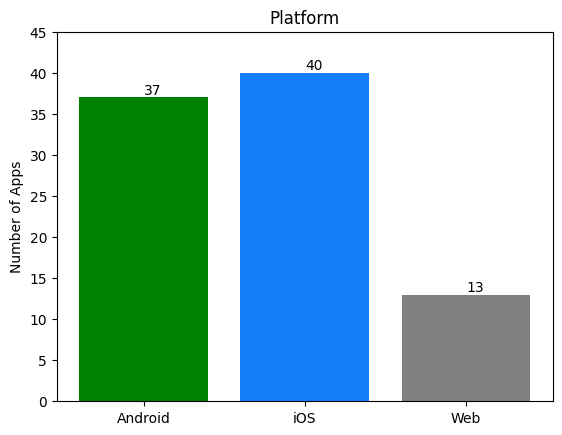

In [112]:
#visualizing platforms
keys_platform = freq_platform.keys()
values_platform = freq_platform.values()

platform_barplot = plt.bar(keys_platform, values_platform, color=['green','#147EFB','grey'])
plt.ylim([0,45])
plt.title('Platform')
plt.ylabel('Number of Apps')
for bar in platform_barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.savefig('platform.png')


plt.show()

In [113]:
#2 functionalities
# saving to a string
functionalities = db['functionalities'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_functionalities = "(Accessibility|Spanish|Email or Export Your Data|Offline|Own Your Own Data|Send your data to a medical record)"
dic_functionalities = {}
match_functionalities = re.findall(reg_functionalities, functionalities, flags=re.IGNORECASE)

freq_functionalities = {}
for i in match_functionalities:
    if i in freq_functionalities:
        freq_functionalities[i] += 1
    else:
        freq_functionalities[i] = 1
print(freq_functionalities)

{'Accessibility': 18, 'Spanish': 15, 'Email or Export Your Data': 17, 'Own Your Own Data': 10, 'Offline': 13}


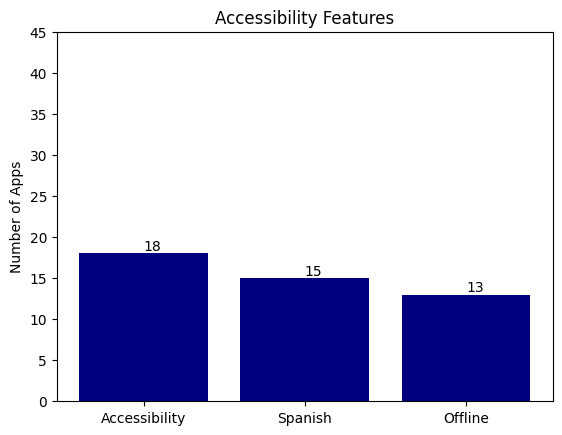

In [114]:
#visualizing accessibility 
access = {'Accessibility': 18, 'Spanish': 15, 'Offline': 13}

keys_access = access.keys()
values_access = access.values()

accessibility_barplot = plt.bar(keys_access, values_access, color=['navy'])
plt.ylim([0,45])
plt.ylabel('Number of Apps')
plt.title('Accessibility Features')
for bar in accessibility_barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.savefig('access.png')

plt.show()

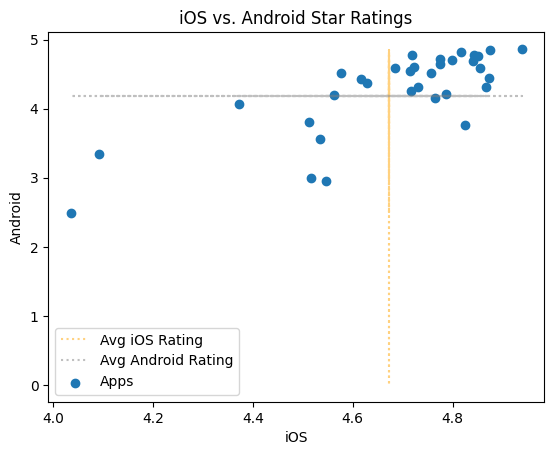

In [148]:
#3 star ratings
mean_ios_rating = [db['ios_rating'].mean()] * len(db["android_rating"])
#print(mean_ios_rating)
mean_android_rating = [db['android_rating'].mean()] * len(db["ios_rating"])
#print(mean_android_rating)

ax = plt.subplot()

scatter = ax.scatter(db['ios_rating'],db['android_rating'], marker = 'o', label = 'Apps')
x_mean = ax.plot(mean_ios_rating, db['android_rating'], linestyle = 'dotted', color = 'orange',alpha = 0.5, label = 'Avg iOS Rating')
y_mean = ax.plot(db['ios_rating'], mean_android_rating, linestyle = 'dotted', color = 'grey', alpha = 0.5, label = 'Avg Android Rating')

plt.xlabel('iOS')
plt.ylabel('Android')
plt.title('iOS vs. Android Star Ratings')
legend = ax.legend(loc = "lower left")

plt.savefig('star_ratings.png')



In [116]:
#4 number of reviews
plt.figure(figsize = (10,6))


db[['ios_reviews', 'android_reviews']].describe()
#plt.scatter(db['ios_reviews'],db['android_reviews'])
#may not be useful, maybe android and ios versions were launched at different time

,ios_reviews,android_reviews
count,37.00,37.00
mean,87262.08,24083.95
std,221493.89,37785.18
min,15.00,0.00
25%,4691.00,2899.00
50%,17948.00,7812.00
75%,41856.00,23694.00
max,1142512.00,156926.00


<Figure size 1000x600 with 0 Axes>

In [117]:
#5 uses
# saving to a string
uses = db['uses'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_uses = "(Self Help|Reference|Hybrid)"
match_uses = re.findall(reg_uses, uses, flags=re.IGNORECASE)

freq_uses = {}
for i in match_uses:
    if i in freq_uses:
        freq_uses[i] += 1
    else:
        freq_uses[i] = 1
print(freq_uses)

{'Self Help': 39, 'Hybrid': 6, 'Reference': 4}


In [118]:
#6 privacy
# saving to a string
privacy = db['privacy_options'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_privacy = "(Has Privacy Policy|Data Stored on Device|Data Stored on Server|Can Delete Data|App Declares Data Use and Purpose|\
App Reports Security Measures in Place|Is PHI Shared|Is De-Identified Data Shared|Is Anonymized/Aggregate Data Shared|\
Can Opt Out of Data Collection|Meets HIPAA|Has Crisis Management Feature)"
match_privacy = re.findall(reg_privacy, privacy, flags=re.IGNORECASE)

freq_privacy = {}
for i in match_privacy:
    if i in freq_privacy:
        freq_privacy[i] += 1
    else:
        freq_privacy[i] = 1
print(freq_privacy)

{'Has Privacy Policy': 41, 'Data Stored on Server': 40, 'Can Delete Data': 31, 'App Declares Data Use and Purpose': 41, 'App Reports Security Measures in Place': 32, 'Is De-Identified Data Shared': 20, 'Is Anonymized/Aggregate Data Shared': 32, 'Has Crisis Management Feature': 8, 'Meets HIPAA': 5, 'Is PHI Shared': 28, 'Can Opt Out of Data Collection': 8, 'Data Stored on Device': 1}


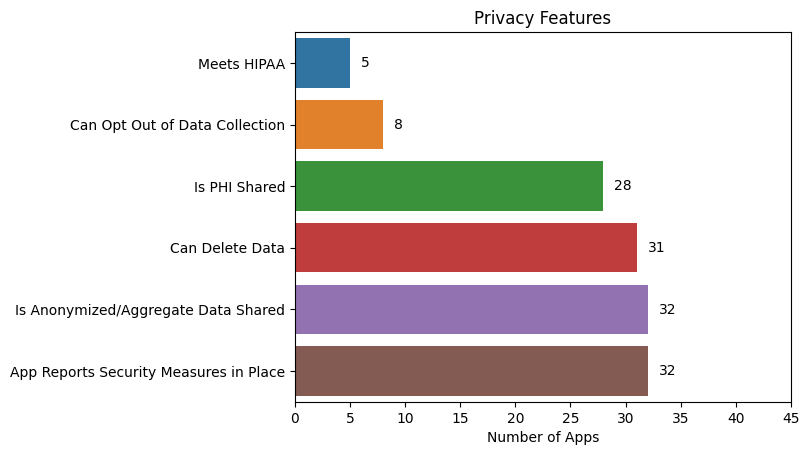

In [119]:
#privacy visualizations
#only getting the data I need
privacy_slide = {'Is PHI Shared': 28, 'Is Anonymized/Aggregate Data Shared': 32, 
                 'Meets HIPAA': 5, 'Can Delete Data': 31, 'Can Opt Out of Data Collection': 8, 
                 'App Reports Security Measures in Place': 32} 


#making a dataframe
privacy_df = pd.DataFrame(data=privacy_slide, index = [0])
#melting
privacy_df = privacy_df.melt()
#plotting
ax = sns.barplot(data= privacy_df, x = 'value', y = 'variable', orient = 'h', order = privacy_df.sort_values('value').variable)
ax.set(xlabel = 'Number of Apps', ylabel = '', xlim = [0,45], title = 'Privacy Features')
#adding values to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center') 
plt.savefig('privacy.png', dpi=300, bbox_inches='tight')
plt.show()


In [120]:
#7 privacy policy reading level
#in presentation give examples on what a reading level is 
privacy_reading_level = db['privacy_reading_level']
privacy_reading_level.mean()

13.439024390243903

{'Track Mood': 14, 'Psychoeducation': 15, 'Journaling': 13, 'Mindfulness': 33, 'Deep Breathing': 30, 'CBT': 9, 'DBT': 2, 'Coach/Therapist Connection': 11, 'Goal Setting/Habits': 16, 'Productivity': 8, 'Peer Support': 8, 'Physical Health': 5, 'Track Sleep': 4, 'Biodata': 5, 'iCBT or Sleep Therapy': 7, 'ACT': 3, 'Track Symptoms': 5, 'Picture Gallery': 2, 'Hope Board': 2, 'Track Medication': 1, 'Bio Feedback with Sense Data': 3}


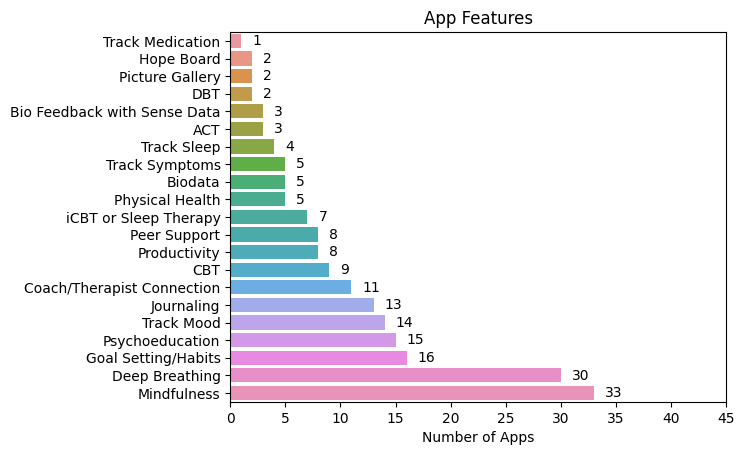

In [142]:
#8 Features

# saving to a string
features = db['features'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_features = "(Track Mood|Track Medication|Track Sleep|Track Symptoms|Productivity|Physical Health|\
Psychoeducation|Journaling|Mindfulness|Deep Breathing|Picture Gallery|Hope Board|iCBT or Sleep Therapy|CBT|\
ACT|DBT|Peer Support|Coach/Therapist Connection|Biodata|Goal Setting/Habits|Physical Health Exercises|\
Chatbot Interaction|Bio Feedback with Sense Data)"

match_features = re.findall(reg_features, features)

freq_features = {}
for i in match_features:
    if i in freq_features:
        freq_features[i] += 1
    else:
        freq_features[i] = 1
print(freq_features)
#freq_features = {'Track Mood': 14, 'Psychoeducation': 15, 'Journaling': 13, 'Mindfulness': 33, 'Deep Breathing': 30, 'CBT': 9, 'DBT': 2, 'Coach/Therapist Connection': 11, 'Goal Setting/Habits': 16, 'Productivity': 8, 'Peer Support': 8, 'Physical Health': 5, 'Track Sleep': 4, 'Biodata': 5, 'iCBT or Sleep Therapy': 7, 'ACT': 13, 'Track Symptoms': 5, 'Picture Gallery': 2, 'Hope Board': 2, 'Track Medication': 1, 'Bio Feedback with Sense Data': 3}

#making a dataframe
features_df = pd.DataFrame(data=freq_features, index = [0])
#melting
features_df = features_df.melt()
#plotting
ax = sns.barplot(data= features_df, x = 'value', y = 'variable', orient = 'h', order = features_df.sort_values('value').variable)
ax.set(xlabel = 'Number of Apps', ylabel = '',  xlim = [0,45], title = 'App Features')
#adding values to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center') 
plt.savefig('features.png', dpi=300, bbox_inches='tight')
plt.show()


{'User Generated Data': 20, 'Chat/Message': 13, 'Assessments/Screenings': 8, 'Real Time Response': 9, 'AI Support': 9, 'Audio/Music/Scripts': 34, 'Asynchronous Response': 5, 'Gamification': 13, 'Videos': 16, 'Peer Support': 8, 'Collaborative With Provider/Other': 4, 'Network Support': 1}


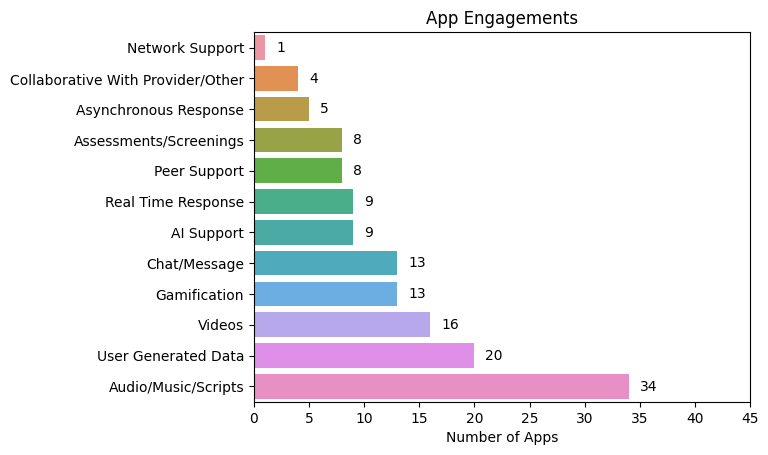

In [122]:
#9 engagements

# saving to a string
engagements = db['engagements'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_engagements = "(User Generated Data|Chat/Message|Assessments/Screenings|Real Time Response|Asynchronous Response|Gamification|Videos|Audio/Music/Scripts|AI Support|Peer Support|Network Support|Collaborative With Provider/Other)"
match_engagements = re.findall(reg_engagements, engagements, flags=re.IGNORECASE)

freq_engagements = {}
for i in match_engagements:
    if i in freq_engagements:
        freq_engagements[i] += 1
    else:
        freq_engagements[i] = 1
print(freq_engagements)



#making a dataframe
engagements_df = pd.DataFrame(data=freq_engagements, index = [0])
#melting
engagements_df = engagements_df.melt()
#plotting
ax = sns.barplot(data= engagements_df, x = 'value', y = 'variable', orient = 'h', order = engagements_df.sort_values('value').variable)
ax.set(xlabel = 'Number of Apps', ylabel = '' ,  xlim = [0,45], title = 'App Engagements')
#adding values to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center') 
plt.savefig('engagements.png', dpi=300, bbox_inches='tight')
plt.show()

In [123]:
#11 developer type


# saving to a string
developer_type = db['developer_type'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_developer_type = "(Government|For Profit Company|Non-Profit Company|Healthcare Company|Academic Institution)"
match_developer_type = re.findall(reg_developer_type, developer_type, flags=re.IGNORECASE)

freq_developer_type = {}
for i in match_developer_type:
    if i in freq_developer_type:
        freq_developer_type[i] += 1
    else:
        freq_developer_type[i] = 1
print(freq_developer_type)

{'For Profit Company': 39, 'Non-Profit Company': 1, 'Academic Institution': 1}


In [124]:
#10 cost (individual key words)


# saving to a string
cost = db['cost'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_cost = "(Free to Download|Totally Free|Payment|In-App Purchase|Subscription)"
match_cost = re.findall(reg_cost, cost, flags=re.IGNORECASE)

freq_cost = {}
for i in match_cost:
    if i in freq_cost:
        freq_cost[i] += 1
    else:
        freq_cost[i] = 1
print(freq_cost)



{'Free to Download': 38, 'Subscription': 32, 'Totally Free': 5, 'In-App Purchase': 21, 'Payment': 1}


{"['Free to Download', 'Subscription']": 13, '[]': 1, "['Totally Free']": 1, "['Free to Download', 'In-App Purchase']": 2, "['Free to Download', 'In-App Purchase', 'Subscription']": 17, "['Free to Download', 'Subscription', 'In-App Purchase']": 2, "['Free to Download', 'Totally Free']": 4, "['Payment']": 1}


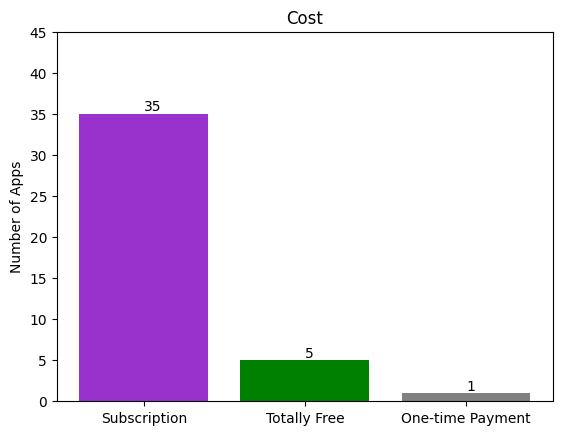

In [125]:
#cost but grouped for visualization

test_cost = db['cost'].to_list()
test_dict = {}
for c in range(len(test_cost)):
    test_dict[test_cost[c]] = test_cost.count(test_cost[c])
    
print(test_dict)

new_cost = {"Subscription": 35, "Totally Free":5, "One-time Payment":1}


#visualizing cost

keys_new_cost = new_cost.keys()
values_new_cost = new_cost.values()

cost_barplot = plt.bar(keys_new_cost, values_new_cost, color=['darkorchid','green','grey'])
plt.ylim([0,45])
plt.title('Cost')
plt.ylabel('Number of Apps')
for bar in cost_barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.savefig('cost.png')
plt.show()

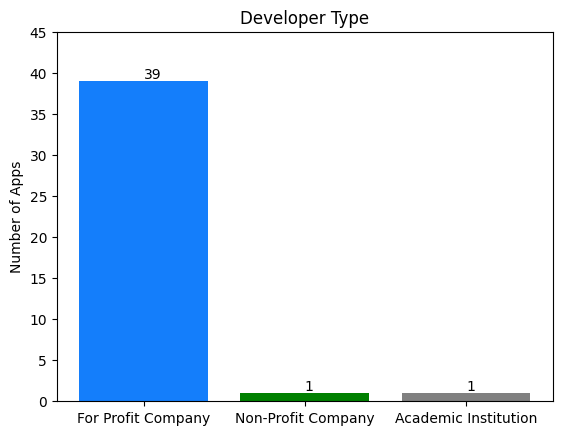

In [126]:
#visualizing app developer
keys_developer_type = freq_developer_type.keys()
values_developer_type = freq_developer_type.values()

developer_barplot = plt.bar(keys_developer_type, values_developer_type, color=['#147EFB','green','grey'])
plt.ylim([0,45])
plt.title('Developer Type')
plt.ylabel('Number of Apps')
for bar in developer_barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.savefig('developer.png')
plt.show()

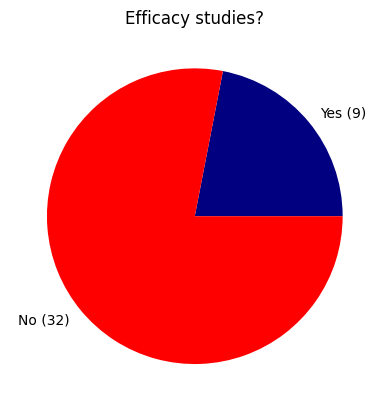

In [127]:
#12 Efficacy studies
#find out how many apps have studies 
db['efficacy_studies'].isna().sum()

efficacy_list = [9,32]
efficacy_dict = {'Yes': 9, 'No': 32}
efficacy_df = pd.DataFrame(efficacy_dict, index = [0])

plt.pie(efficacy_list, labels = ['Yes (9)', 'No (32)'], colors = ['navy', 'red'], normalize= True)
plt.title('Efficacy studies?')
plt.savefig('efficacy.png')

In [128]:
db['efficacy_studies'].median()

2.0

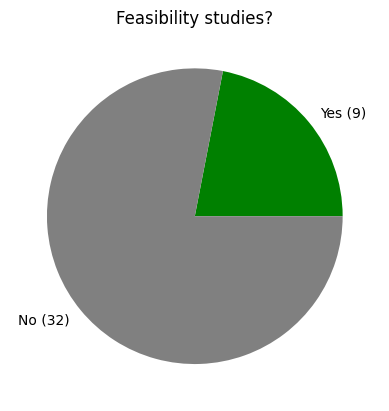

In [129]:
#13 Feasibility studies
#find out how many apps have studies 
db['feasibility_studies'].isna().sum()

feasibility_list = [9,32]
feasibility_dict = {'Yes': 9, 'No': 32}
feasibility_df = pd.DataFrame(feasibility_dict, index = [0])

plt.pie(feasibility_list, labels = ['Yes (9)', 'No (32)'], colors = ['green', 'grey'], normalize= True)
plt.title('Feasibility studies?')
plt.savefig('feasibility.png')

In [130]:
db['feasibility_studies'].median()

1.0

In [131]:
#14 outputs
#not sure how this is helpful to the presentation

# saving to a string
developer_type = db['outputs'].str.cat(sep=' ')


In [132]:
#15 clinical foundation


# saving to a string
clinical_foundations = db['clinical_foundations'].str.cat(sep=' ')

#using regex to count number of each funtion in the data
reg_clinical_foundations = "(Well Written Relevant Content|Does What it Claims|Patient Facing|Can Cause Harm|Use Warning|Supporting Studies)"
match_clinical_foundations = re.findall(reg_clinical_foundations, clinical_foundations, flags=re.IGNORECASE)

freq_clinical_foundations = {}
for i in match_clinical_foundations:
    if i in freq_clinical_foundations:
        freq_clinical_foundations[i] += 1
    else:
        freq_clinical_foundations[i] = 1
print(freq_clinical_foundations)

{'Well Written Relevant Content': 40, 'Does What it Claims': 41, 'Patient Facing': 41, 'Supporting Studies': 11, 'Can Cause Harm': 1, 'Use Warning': 10}


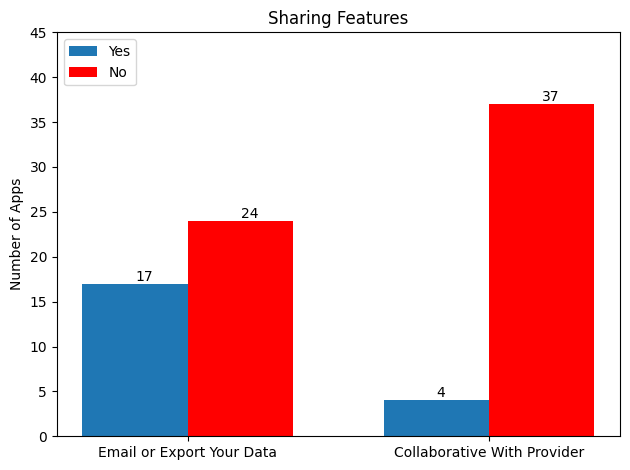

In [143]:
#data sharing

data_sharing = [17, 4]
no = [24, 37]
labels = ['Email or Export Your Data', 'Collaborative With Provider']


x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

share1 = ax.bar(x - width/2, data_sharing, width, label='Yes')
share2 = ax.bar(x + width/2, no, width, label='No', color = 'red')

#sharing_barplot = plt.bar(sharing_dict.keys(), sharing_dict.values(), color = ['navy', 'orange'])

plt.ylim([0,45])
ax.set_title('Sharing Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper left')
ax.set_ylabel('Number of Apps')

for bar in share1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
    
for bar in share2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

fig.tight_layout()

plt.savefig('sharing.png')
plt.show()